# Using Built-In Observatories

You can create whatever observatory you like -- specifying antenna positions, beam patterns, and so on -- but there are a few built-in observatories that you can use for convenience. In this tutorial, we'll show you how to use them.

In [12]:
from py21cmsense.observatory import Observatory, get_builtin_profiles
from py21cmsense.sensitivity import PowerSpectrum
from py21cmsense.observation import Observation
from astropy import units as un
import matplotlib.pyplot as plt

To see which observatory profiles are available:

In [2]:
get_builtin_profiles()

['MWA-PhaseII', 'HERA-H1C-IDR3', 'SKA-LOW1-central', 'SKA-LOW1-core']

As you can see, these are not simply full telescopes, but specific flavours of the
telescopes. More of these can be added upon request.

To create an observatory from a built-in profile:

In [3]:
obs = Observatory.from_profile('SKA-LOW1-central')

In [4]:
print(f"SKA LOW1 central has {len(obs.antpos)} antennas")

SKA LOW1 central has 296 antennas


In [5]:
print("SKA LOW1 has a beam width of ", obs.beam.fwhm)

SKA LOW1 has a beam width of  0.06038676654 rad


When you create an observatory, you can override parameters:

In [6]:
obs = Observatory.from_profile("SKA-LOW1-central", frequency=75 * un.MHz)

In [7]:
print(obs.frequency)

75.0 MHz


Let's check out the significance of a power spectrum detection with the SKA-central configuration:

In [8]:
sense = PowerSpectrum(
    observation=Observation(observatory=obs)    
)

In [9]:
print(sense.calculate_significance())

averaging to 1D: 100%|██████████| 564/564 [00:03<00:00, 170.10kperp-bins/s]

0.7289480861797337


Let's see the coherently-averaged UV-coverage:

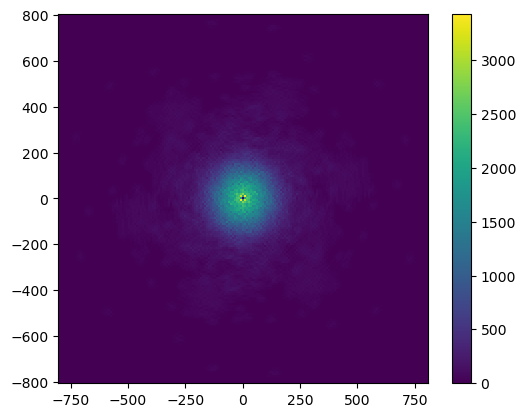

In [14]:
plt.imshow(
    sense.observation.uv_coverage, 
    extent=(sense.observation.ugrid.min(), sense.observation.ugrid.max())*2
)
plt.colorbar()